## Exo 12

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import plotly.graph_objects as go

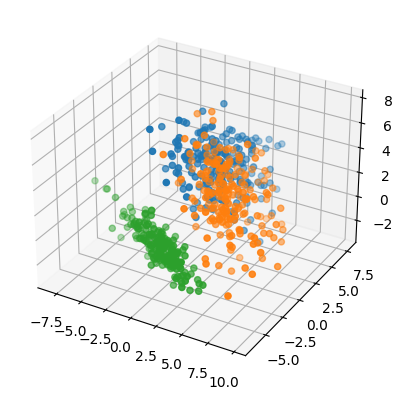

In [35]:
Ni = 200

# Une gaussienne 3D par classe
m1 = [1, 3, 3]
S1 = [[3, 2, -1.9],[2, 3, 0],[-1.9, 0, 3]]

m2 = [4, 0, 3]
S2=[[6, -2.5, -1.9],[-2.5, 6, -0.5],[-1.9, -0.5, 4]]

m3 = [0, -4, 0]
S3=[[5, -1.5, -0.9], [-1.5, 1, -0.1], [-0.9, -0.1, 1]]

x1 = multivariate_normal.rvs(m1, S1, Ni)
x2 = multivariate_normal.rvs(m2, S2, Ni)
x3 = multivariate_normal.rvs(m3, S3, Ni)
X1 = np.concatenate((x1, 10*np.random.normal(size=(Ni, 17))), axis=1)
X2 = np.concatenate((x2, 10*np.random.normal(size=(Ni, 17))), axis=1)
X3 = np.concatenate((x3, 10*np.random.normal(size=(Ni, 17))), axis=1)
X = np.concatenate((X1, X2, X3), axis=0)

N, D = X.shape

# Etiquette des classes
CC =  np.array([1 * np.ones(Ni), 2 * np.ones(Ni), 3 * np.ones(Ni)]).flatten()

# Affichage en 3D des 3 premières coordonnées
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2])
ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2])
ax.scatter(X3[:, 0], X3[:, 1], X3[:, 2])

In [36]:
# Création des traces pour chaque ensemble de points
trace1 = go.Scatter3d(
    x=X1[:, 0],
    y=X1[:, 1],
    z=X1[:, 2],
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='X1'
)

trace2 = go.Scatter3d(
    x=X2[:, 0],
    y=X2[:, 1],
    z=X2[:, 2],
    mode='markers',
    marker=dict(size=5, color='red'),
    name='X2'
)

trace3 = go.Scatter3d(
    x=X3[:, 0],
    y=X3[:, 1],
    z=X3[:, 2],
    mode='markers',
    marker=dict(size=5, color='green'),
    name='X3'
)

# Mise en forme et affichage de la figure
fig = go.Figure(data=[trace1, trace2, trace3])

fig.update_layout(
    title='Scatter 3D avec Plotly',
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis'
    )
)

fig.show()


LDA (Linear Discriminant Analysis)

In [ ]:
def tamu_lda(x, labels):

    nb_classes = np.max(labels)
    nb_dim = x.shape[1]
    


In [ ]:
function [y, v, d] = tamu_lda(x, clab);



nc = max(clab);
nf = size(x,2);

[Sb, Sw, Sm] = tamu_scattermat(x, clab);
[v1, d1]     = eig(pinv(Sw)*Sb, 'nobalance');

% Sort axis by decreasing eigenvalues

d1 = diag(d1);
[dmy, ix] = sort(-real(d1));
d1 = d1(ix);
v1 = v1(:,ix);

figure(100); plot(d1);
% Eliminate irrelevant dimensions and project data

d    = d1(1:min(nf,(nc-1)));
maxd = max(d);
nd   = sum(d>maxd/100);
nd = min([nf nc-1]);

d = d(1:nd);
v = v1(:,1:nd);
y = x*v;